Task 1:
To kick things off you can start by scraping Mamaearth’s Beauty category:
https://mamaearth.in/product-category/beauty
Ideally you would want to scarpe the following basic data points:

* Product Name
* Product Link
* Rating
* Reviews
* MRP
* Pack Size
* Discount/Offers running on the product

We would like you to write a classification algorithm which can fetch the key ingredient used in the
product and also classify the product based on its category. So, taking Mamaearth Onion Hair Oil as an
example, the key ingredient here is Onion and the category is Hair Oil.

# Web Scraping

In [1]:
!pip install selenium

In [2]:
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:13 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic

In [3]:

# Python Script for Webscraping

# Setting up Selenium Webdriver

from selenium import webdriver as wb
webD = wb.Chrome('chromedriver', chrome_options=chrome_options)

# BASE_URL for extracting titles and links
BASE_URL = "https://mamaearth.in/product-category/beauty"

# Make the 'get' request on the BASE_URL
webD.get(BASE_URL)


'''
We need to scarpe the following things:
1. Title
2. Product Link
3. Ratings
4. Reviews
5. MRP
6. Pack Size
7. Discount/Offers running on the product
'''
'''
# 1. Title

title_tag_name = 'section' # Create a list/tuple in case of multiple tag_names
title_class_name = 'title'

def scrape_title(title_tag_name, title_class_name):

  #titles_response = webD.find_elements_by_tag_name('section')[1].find_elements_by_class_name('title')

  # Get the title response variable
  title_response = webD.find_elements_by_tag_name(title_tag_name)[1].find_elements_by_class_name(title_class_name)

  # Get the title text from the title_response variable
  title_text = [title.text for title in title_response]

  return title_text
'''
# 1. Product Link

link_tag_name = ['section', 'a']

def scrape_product_link(link_tag_name):

  # Get the link response list
  link_response = webD.find_elements_by_tag_name(link_tag_name[0])[1].find_elements_by_tag_name(link_tag_name[1])
  # Create a list to store the links
  link_text = []
  for i, link in enumerate(link_response): #--> Iterating over each response variable
      link_text.append(link_response[i].get_property('href')) # 'href' attribute contains the links

  link_text_unique = list(set(link_text))
  return link_text_unique

# 2. Title
title_tag_name = 'h1'

def scrape_title(title_tag_name):

  # list for storing title
  titles = []

  # Call the product link
  product_links = scrape_product_link(link_tag_name)

  # Iterate over each product link
  for link in product_links:
    
    # make the get request
    webD.get(link)

    title = webD.find_elements_by_tag_name(title_tag_name)[0].text
    titles.append(title)
  
  return titles

# Ratings, Reviews, MRP, Discount

css_selector = '[href^="#review-list"]' #--> CSS selector for getting the ratings
review_class = 'ReviewItem_content' #--> review_class for getting reviews
price_class_1 = 'price' #--> price_class for getting price
price_class_2 = 'slashed price'
price_class_3 = 'price__discount'

def scrape_ratings_reviews_mrp_discount(css_selector, review_class, price_class_1, price_class_2, price_class_3, prod_links):

  # Create lists to store the scraped data
  ratings = []
  reviews = []
  mrp = []
  discounts = []

  # Get the link_text using the scrape_product_link
  product_links = prod_links

  # Iterate over each product_link, make the get request
  for i, link in enumerate(product_links):
    
    # make a get request
    webD.get(link)

    # 3. Extract ratings
    # Rating respomse list
    rating_response = webD.find_elements_by_css_selector(css_selector)

    if len(rating_response) != 0 :
      rating = webD.find_elements_by_css_selector(css_selector)[0].text # Rating for ith product
    else:
      rating = str(0.0)
    ratings.append(rating) # append the rating


    # 4. Extract Reviews
    # review response variable list
    review_response = webD.find_elements_by_class_name(review_class)

    # Reviews will be a list of list because a product can have multiple reviews as well
    review = [rev.text for rev in review_response]

    # append the review in the reviews list
    reviews.append(review)

    # 5. MRP

    price_response_1 = webD.find_elements_by_class_name(price_class_1) 
    price_response_2 = webD.find_elements_by_class_name(price_class_2)
    price_response_3 = webD.find_elements_by_class_name(price_class_3)

    # Check which repsonse variable is not empty
    if len(price_response_1) != 0:
      price = price_response_1[0].text
    else:
      price = price_response_2[0].text
    mrp.append(price)

    # 6. Discount
    
    # Note: Not all product will be having discount
    if len(price_response_3) != 0:
      discount = price_response_3[0].text
    else:
      discount = 0.0
    discounts.append(discount)

  # Return the scraped data
  return ratings, reviews, mrp, discounts

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: use options instead of chrome_options
  import sys


In [4]:
# 2. Product Links
links = scrape_product_link(link_tag_name)

In [5]:
# 7. Scrape Product Description

desc_xpath1 = '//*[@id="__next"]/div[2]/div[1]/div[3]/div[2]/div/div[5]' # Xpath for Description
desc_xpath2 = '//*[@id="__next"]/div[2]/div[1]/div[2]/div[2]/div/div[5]' #---> Bottleneck
prod_links = links # Links for the product

def scrape_description(xpath1, xpath2, prod_links):

  # list to store the description of the product
  descriptions = []

  # Iterate over each link
  for link in prod_links:

    # make a get request
    webD.get(link)

    # create the description repsonse list
    desc_response1 = webD.find_elements_by_xpath(xpath1)
    desc_response2 = webD.find_elements_by_xpath(xpath2)
    if len(desc_response1) != 0 :
      desc = desc_response1[0].text # Product Description
    elif len(desc_response2) != 0:
      desc = desc_response2[0].text # Product description
    else:
      desc = "No Description Provided"

    # Append the product description to the descriptions list
    descriptions.append(desc)
  
  return descriptions

# 8. Scrape the Ingredients

ing_xpath_1 = '//*[@id="__next"]/div[2]/div[1]/div[4]/div[2]/div/ul' # //*[@id="__next"]/div[2]/div[1]/div[3]/div[2]/div/ul
def scrape_key_ingredients(ing_xpath_1, prod_links):

  # list to store the key ingredients
  key_ingredients = []

  # Iterate over each product link
  for link in prod_links:

    # make a get request
    webD.get(link)

  
    # create an ingredients response list
    ing_response_1 = webD.find_elements_by_xpath(ing_xpath_1)
    if len(ing_response_1) != 0:
      key_ing = ing_response_1[0].text.partition(':')[0] # Key ingredient
    else:
      key_ing = 'No Ingrdient Provided'

    # Append the key_ing in the key_ingredients list
    key_ingredients.append(key_ing)

  return key_ingredients

In [6]:
# 1. Title
titles = scrape_title(title_tag_name)

In [ ]:
# 3. Ratings, Reviews, MRP, Discounts
ratings, reviews, mrp, discounts = scrape_ratings_reviews_mrp_discount(css_selector, review_class, price_class_1, price_class_2, price_class_3, links)

# 4. Descriptions
descriptions = scrape_description(xpath1 = desc_xpath1, xpath2 = desc_xpath2, prod_links=prod_links)

In [8]:
# 5. Key Ingredients
key_ingredients = scrape_key_ingredients(ing_xpath_1=ing_xpath_1, prod_links=prod_links)

In [17]:
key_ingredients[42] = 'Carrot Seed Oil'

# Data Preparation

In [19]:
import pandas as pd

# Create a function to create a pandas dataframe
def create_dataframe():
  data = pd.DataFrame({'Title' : titles, 'Product_Link' : links, 'Ratings' : ratings, 'Reviews' : reviews, 'MRP' : mrp, 'Discounts' : discounts, 'Description' : descriptions, 'Key_Ingredients' : key_ingredients})
  return data

# Call the above function and create a DatFrame
mamaearth_data = create_dataframe()
mamaearth_data.head()

,Title,Product_Link,Ratings,Reviews,MRP,Discounts,Description,Key_Ingredients
0,"Tea Tree Facewash for acne and pimples, Pack O...",https://mamaearth.in/product/tea-tree-facewash...,5.0\n★,[It's amazing product..I have no words to prai...,₹489.00,(2% off),Mamaearth’s SLS and Paraben Free Tea Tree Face...,Neem
1,Vitamin C Clear Skin Combo - 200 ml,https://mamaearth.in/product/vitamin-c-clear-s...,5.0\n★,[I liked both products used today refreshing c...,₹739.00,(1% off),Hurry! Only 18 Units Left in Stock!,Vitamin C
2,Argan Conditioner with Argan & Apple Cider Vin...,https://mamaearth.in/product/argan-conditioner...,4.9\n★,"[I like this product, This is the argan condit...",₹349.00,0,"When it comes to taming frizzy hair, there are...",Argan Oil
3,Retinol Face Serum,https://mamaearth.in/product/mamaearth-retinol...,4.9\n★,"[Excellent product, very effective....., serum...",₹799.00,0,Hurry! Only 18 Units Left in Stock!,Retinol
4,Onion Hair Oil for Hair Regrowth & Hair Fall C...,https://mamaearth.in/product/onion-hair-oil-fo...,4.9\n★,"[Very goooooood, Good, Good]",₹599.00,0,Hurry! Only 16 Units Left in Stock!,Onion Seed Oil


In [68]:
''' 
Next we can observe, some values in the key ingredients column has 'No Ingrdient Provided' value, 
this means that we were not able to fetch data with the current xpath. Hence, we will use some other xpath to fetch this data.
This can be considered one of the corner cases.
'''
from selenium.common.exceptions import NoSuchElementException
no_ing_data_idx = mamaearth_data[mamaearth_data['Key_Ingredients'] == 'No Ingrdient Provided'].index # index of those rows having 'No Ingredient'Provided
no_ing_data = mamaearth_data[mamaearth_data['Key_Ingredients'] == 'No Ingrdient Provided']['Product_Link']  # Product links for the products
xpath_2 = '/html/body/div[1]/div[2]/div[1]/div[3]/div[2]/div/ul/li[1]/span/strong' # New xpath
xpath_3 = '//*[@id="__next"]/div[2]/div[1]/div[3]/div[2]/div/ul/li[1]/p/strong' # for further bottlenecks
xpath_4 = '//*[@id="__next"]/div[2]/div[1]/div[4]/div[2]/div/div/ul[1]/li[1]/span/strong' # another corner case

key_ingredients_2 = [] # List to store the key ingredients
for link in no_ing_data:
  print(link)
  webD.get(link)
  try:
    key_ing_2 = webD.find_element_by_xpath(xpath_2).text.partition(':')[0]
  except NoSuchElementException:
    try:
      key_ing_2 = webD.find_element_by_xpath(xpath_3).text.partition(':')[0]
    except:
      key_ing_2 = webD.find_element_by_xpath(xpath_4).text.partition(':')[0]
  key_ingredients_2.append(key_ing_2)

https://mamaearth.in/product/buy-epsom-salt-online
https://mamaearth.in/product/oil-free-face-moisturizer-with-apple-cider-vinegar-for-acne-prone-skin
https://mamaearth.in/product/mamaearths-ultra-light-indian-sunscreen
https://mamaearth.in/product/stretch-marks-removal-cream
https://mamaearth.in/product/rice-water-hair-mask-with-rice-water-keratin-for-smoothening-hair-damage-repair-200-g
https://mamaearth.in/product/damage-repair-kit
https://mamaearth.in/product/vitamin-c-oil-free-moisturizer-for-face-with-vitamin-c-gotu-kola-for-skin-illumination-80-ml
https://mamaearth.in/product/vitamin-c-face-scrub-for-glowing-skin-with-vitamin-c-and-walnut-for-skin-illumination-100-g
https://mamaearth.in/product/vitamin-c-night-cream-for-women-with-vitamin-c-gotu-kola-for-skin-illumination-50g
https://mamaearth.in/product/natural-nip-care-cream
https://mamaearth.in/product/ubtan-face-mask-for-skin-lightening-brightening
https://mamaearth.in/product/buy-hair-growth-tonic
https://mamaearth.in/produ

In [87]:
for i, idx in enumerate(no_ing_data_idx):
  mamaearth_data['Key_Ingredients'].loc[idx] = key_ingredients_2[i]

In [90]:
# Preprocessing data

import re # Regular Expressions for preprocessing text data
import numpy as np # Numpy aur computations

def pack_size_cleaner(x):
  # Extract numbers and alphabets eg. 90 ml, 100 g
  if ' ' in x:
    x = x.replace(' ', '') # Remove the space 90 ml --> 90ml 
  return re.findall('[0-9 a-z A-Z]+', x)

def preprocess_ratings(x):
  #Convert the ratings into float
  try: 
    x = np.float(x)
  except:
    x = np.nan #--> If not possible replace the value with NaN
  return x

def preprocess_mrp(x):
  # Convert the MRP into float
  if ',' in x:
    x = x.replace(',', '')
  return np.float(x[1:]) 

def preprocess_discounts(x):
  # Extract the discounts
  x = str(x)
  return re.findall(r'\b\d+\b', x)

def preprocess_key_ingredients(x):
  return " ".join(re.findall('[a-zA-Z]+', x))

# Create a product category feature

'''A list of common product categories is created after observing the products from the webpage. Rest those products which occur less frequently
   are clubbed into Misc (Miscellaneous) category. The reason for this kind of classification is simple, those products which are occuring only 
   once or twice should not be given a unique category, this will lead to too many classes and less data for less frequently occuring classes will
   lead to a poor classification model.'''

categories = ['Hair Oil', 'Shampoo', 'Conditioner', 'Mask', 'Serum', 'Face Wash', 'Body Wash', 'Body Lotion', 'Combo', 'Kit']

def product_category(categories, x):

  # Iterate over each category and check whether it is present in x or not
  for cat in categories:
    if cat in x:
      x = cat
    elif 'Facewash' in x: #--> Corner Case
      x = 'Face Wash'
  if len(x) > 20:
    x = 'Misc'
  return x

In [91]:
# Preprocess the Numerical Features using the above functions
mamaearth_data['Pack_Size'] = mamaearth_data['Title'].apply(lambda x : x[-6:] if ((x[-2:] in 'ml') or (x[-1] in 'g')) else "Size Not Mentioned")
mamaearth_data['Pack_Size'] = mamaearth_data['Pack_Size'].apply(lambda x : pack_size_cleaner(x)[0])
mamaearth_data["Ratings"] = mamaearth_data["Ratings"].apply(lambda x : x[ : 3])
mamaearth_data['Ratings'] = mamaearth_data['Ratings'].apply(lambda x : preprocess_ratings(x))
mamaearth_data['MRP'] = mamaearth_data['MRP'].apply(lambda x : preprocess_mrp(x))
mamaearth_data['Discounts'] = mamaearth_data['Discounts'].apply(lambda x: float(preprocess_discounts(x)[0]))
mamaearth_data['Key_Ingredients'] = mamaearth_data['Key_Ingredients'].apply(lambda x : preprocess_key_ingredients(x))
mamaearth_data['Product_Category'] = mamaearth_data['Title'].apply(lambda x : product_category(categories, x))

In [92]:
mamaearth_data

,Title,Product_Link,Ratings,Reviews,MRP,Discounts,Description,Key_Ingredients,Pack_Size,Product_Category
0,"Tea Tree Facewash for acne and pimples, Pack O...",https://mamaearth.in/product/tea-tree-facewash...,5.0,[It's amazing product..I have no words to prai...,489.0,2.0,Mamaearth’s SLS and Paraben Free Tea Tree Face...,Neem,SizeNotMentioned,Face Wash
1,Vitamin C Clear Skin Combo - 200 ml,https://mamaearth.in/product/vitamin-c-clear-s...,5.0,[I liked both products used today refreshing c...,739.0,1.0,Hurry! Only 18 Units Left in Stock!,Vitamin C,200ml,Combo
2,Argan Conditioner with Argan & Apple Cider Vin...,https://mamaearth.in/product/argan-conditioner...,4.9,"[I like this product, This is the argan condit...",349.0,0.0,"When it comes to taming frizzy hair, there are...",Argan Oil,250ml,Conditioner
3,Retinol Face Serum,https://mamaearth.in/product/mamaearth-retinol...,4.9,"[Excellent product, very effective....., serum...",799.0,0.0,Hurry! Only 18 Units Left in Stock!,Retinol,SizeNotMentioned,Serum
4,Onion Hair Oil for Hair Regrowth & Hair Fall C...,https://mamaearth.in/product/onion-hair-oil-fo...,4.9,"[Very goooooood, Good, Good]",599.0,0.0,Hurry! Only 16 Units Left in Stock!,Onion Seed Oil,250ml,Hair Oil
...,...,...,...,...,...,...,...,...,...,...
165,Onion Shampoo and Onion Hair Serum Combo,https://mamaearth.in/product/onion-shampoo-oni...,4.0,"[I love this products, Nice, Very good product]",639.0,1.0,Beat hair fall with the goodness of Onion. Sta...,Red Onion,SizeNotMentioned,Shampoo
166,Onion Shampoo for Hair Growth and Hair Fall Co...,https://mamaearth.in/product/onion-shampoo-for...,5.0,[I like this product. It stopped hairfall and ...,559.0,0.0,Hurry! Only 16 Units Left in Stock!,Onion Seed Oil,400ml,Shampoo
167,Vitamin C Glowing Skin Combo,https://mamaearth.in/product/vitamin-c-glowing...,5.0,[I loved the combo.. i m using mamaearth for t...,639.0,1.0,It’s time to be a glow getter with the goodnes...,Vitamin C,SizeNotMentioned,Combo
168,"Anti-Pollution Daily Face Cream, for Dry and O...",https://mamaearth.in/product/anti-pollution-da...,4.9,"[I like mamaearth, foaming face wash &anti-pol...",349.0,0.0,Even though atmospheric pollution leaves a del...,Turmeric,80ml,Misc


# Data Preprocessing and Exploratory Data Analysis

In [93]:
# Create a function that prints the shape, percentage of null values, statistics and information about the data
def data_description(data):

  # Print the number of rows and columns in the data
  rows = data.shape[0]
  cols = data.shape[0]
  print("++++++++++++++++++++++++++++++++++++++++++++++Shape Of Data++++++++++++++++++++++++++++++++++++++++++++")
  print("=======================================================================================================")
  print("The number of rows in the data are {}".format(rows))
  print("The number of columns in the data are {}".format(cols))
  print("=======================================================================================================")
  print()

  # Print the % null values in the data
  for column in data.columns:
    num_null_values = data[column].isnull().sum() # Number of null values in the column
    percentage_null_values = float(num_null_values)*100/rows
    print("++++++++++++++++++++++++++++++++++++++++++++++Percentage Null Values+++++++++++++++++++++++++++++++++++")
    print("=======================================================================================================")
    print("Percentage of null values in the {} column is {:.3f} %".format(column, percentage_null_values))
    print("=======================================================================================================")
    print()

  # Print the descriptive statistics
  print("++++++++++++++++++++++++++++++++++++++++++++++Descriptive Statistics+++++++++++++++++++++++++++++++++++")
  print("=======================================================================================================")
  print(data.describe())
  print("=======================================================================================================")
  print()

  # Print the information about the data
  print("++++++++++++++++++++++++++++++++++++++++++++++Information About Data+++++++++++++++++++++++++++++++++++")
  print("=======================================================================================================")
  print(data.info())
  print("=======================================================================================================")
  print()

In [94]:
data_description(mamaearth_data)

++++++++++++++++++++++++++++++++++++++++++++++Shape Of Data++++++++++++++++++++++++++++++++++++++++++++
The number of rows in the data are 170
The number of columns in the data are 170

++++++++++++++++++++++++++++++++++++++++++++++Percentage Null Values+++++++++++++++++++++++++++++++++++
Percentage of null values in the Title column is 0.000 %

++++++++++++++++++++++++++++++++++++++++++++++Percentage Null Values+++++++++++++++++++++++++++++++++++
Percentage of null values in the Product_Link column is 0.000 %

++++++++++++++++++++++++++++++++++++++++++++++Percentage Null Values+++++++++++++++++++++++++++++++++++
Percentage of null values in the Ratings column is 0.000 %

++++++++++++++++++++++++++++++++++++++++++++++Percentage Null Values+++++++++++++++++++++++++++++++++++
Percentage of null values in the Reviews column is 0.000 %

++++++++++++++++++++++++++++++++++++++++++++++Percentage Null Values+++++++++++++++++++++++++++++++++++
Percentage of null values in the MRP column is 0.00

### OPTIONAL(execute only if null values are encountered)

In [95]:
# Ratings column has 1.176% of null values

null_data = mamaearth_data[mamaearth_data['Ratings'].isnull() == True] #--> Extract the data having null values
null_data

,Title,Product_Link,Ratings,Reviews,MRP,Discounts,Description,Key_Ingredients,Pack_Size,Product_Category


In [ ]:
# Impute the null value as the mean ratings corresponding to the Product_Category
mamaearth_data.groupby('Product_Category').mean()

,Ratings,MRP,Discounts
Product_Category,,,
Body Lotion,4.940000,379.000000,0.000000
Body Wash,4.866667,348.833333,0.000000
Combo,4.870000,986.200000,1.500000
Conditioner,4.900000,375.250000,0.000000
Face Wash,4.891304,464.875000,0.750000
Hair Oil,4.600000,580.400000,0.400000
Kit,4.820000,1033.000000,24.666667
Mask,4.950000,430.363636,0.045455
Misc,4.526829,428.317073,0.000000


In [ ]:
# Since, the null values correspond to Face Wash and Conditioner Product Category, I will impute the null value as the mean ratings corresponding to these 2 categories
mean_face_wash_rating = 4.89
mean_conditioner_rating = 4.90

null_idx = null_data.index # Extract the location of null values

# Iterate over the null indexes and fill the values
for idx in null_idx:
  
  if mamaearth_data.loc[idx]['Product_Category'] == 'Face Wash':
    mamaearth_data['Ratings'].loc[idx] = mean_face_wash_rating
  else:
    mamaearth_data['Ratings'].loc[idx] = mean_conditioner_rating 

In [ ]:
# Check for null values again
mamaearth_data.isnull().sum()

Title               0
Product_Link        0
Ratings             0
Reviews             0
MRP                 0
Discounts           0
Description         0
Key_Ingredients     0
Pack_Size           0
Product_Category    0
dtype: int64

**Null Values have been imputed**

### Feature Engineering

In [96]:
mamaearth_data.head()

,Title,Product_Link,Ratings,Reviews,MRP,Discounts,Description,Key_Ingredients,Pack_Size,Product_Category
0,"Tea Tree Facewash for acne and pimples, Pack O...",https://mamaearth.in/product/tea-tree-facewash...,5.0,[It's amazing product..I have no words to prai...,489.0,2.0,Mamaearth’s SLS and Paraben Free Tea Tree Face...,Neem,SizeNotMentioned,Face Wash
1,Vitamin C Clear Skin Combo - 200 ml,https://mamaearth.in/product/vitamin-c-clear-s...,5.0,[I liked both products used today refreshing c...,739.0,1.0,Hurry! Only 18 Units Left in Stock!,Vitamin C,200ml,Combo
2,Argan Conditioner with Argan & Apple Cider Vin...,https://mamaearth.in/product/argan-conditioner...,4.9,"[I like this product, This is the argan condit...",349.0,0.0,"When it comes to taming frizzy hair, there are...",Argan Oil,250ml,Conditioner
3,Retinol Face Serum,https://mamaearth.in/product/mamaearth-retinol...,4.9,"[Excellent product, very effective....., serum...",799.0,0.0,Hurry! Only 18 Units Left in Stock!,Retinol,SizeNotMentioned,Serum
4,Onion Hair Oil for Hair Regrowth & Hair Fall C...,https://mamaearth.in/product/onion-hair-oil-fo...,4.9,"[Very goooooood, Good, Good]",599.0,0.0,Hurry! Only 16 Units Left in Stock!,Onion Seed Oil,250ml,Hair Oil


In [97]:
# Create a new feature called which stores the price before the discount
def compute_price_before_discount(discounted_price, discount):
  original_price = discounted_price/(1-(discount/100)) # dividing by 100 because the discount is in percentage
  return original_price

In [101]:
mamaearth_data['Price_Before_Discount'] = np.round(compute_price_before_discount(mamaearth_data['MRP'], mamaearth_data['Discounts']))

In [102]:
# Rearrange the columns
mamaearth_final_data = mamaearth_data[['Title', 'Product_Link', 'Ratings', 'Price_Before_Discount', 'Discounts', 'MRP', 'Pack_Size','Description', 'Reviews', 'Product_Category', 'Key_Ingredients']]

In [103]:
mamaearth_final_data.head()

,Title,Product_Link,Ratings,Price_Before_Discount,Discounts,MRP,Pack_Size,Description,Reviews,Product_Category,Key_Ingredients
0,"Tea Tree Facewash for acne and pimples, Pack O...",https://mamaearth.in/product/tea-tree-facewash...,5.0,499.0,2.0,489.0,SizeNotMentioned,Mamaearth’s SLS and Paraben Free Tea Tree Face...,[It's amazing product..I have no words to prai...,Face Wash,Neem
1,Vitamin C Clear Skin Combo - 200 ml,https://mamaearth.in/product/vitamin-c-clear-s...,5.0,746.0,1.0,739.0,200ml,Hurry! Only 18 Units Left in Stock!,[I liked both products used today refreshing c...,Combo,Vitamin C
2,Argan Conditioner with Argan & Apple Cider Vin...,https://mamaearth.in/product/argan-conditioner...,4.9,349.0,0.0,349.0,250ml,"When it comes to taming frizzy hair, there are...","[I like this product, This is the argan condit...",Conditioner,Argan Oil
3,Retinol Face Serum,https://mamaearth.in/product/mamaearth-retinol...,4.9,799.0,0.0,799.0,SizeNotMentioned,Hurry! Only 18 Units Left in Stock!,"[Excellent product, very effective....., serum...",Serum,Retinol
4,Onion Hair Oil for Hair Regrowth & Hair Fall C...,https://mamaearth.in/product/onion-hair-oil-fo...,4.9,599.0,0.0,599.0,250ml,Hurry! Only 16 Units Left in Stock!,"[Very goooooood, Good, Good]",Hair Oil,Onion Seed Oil


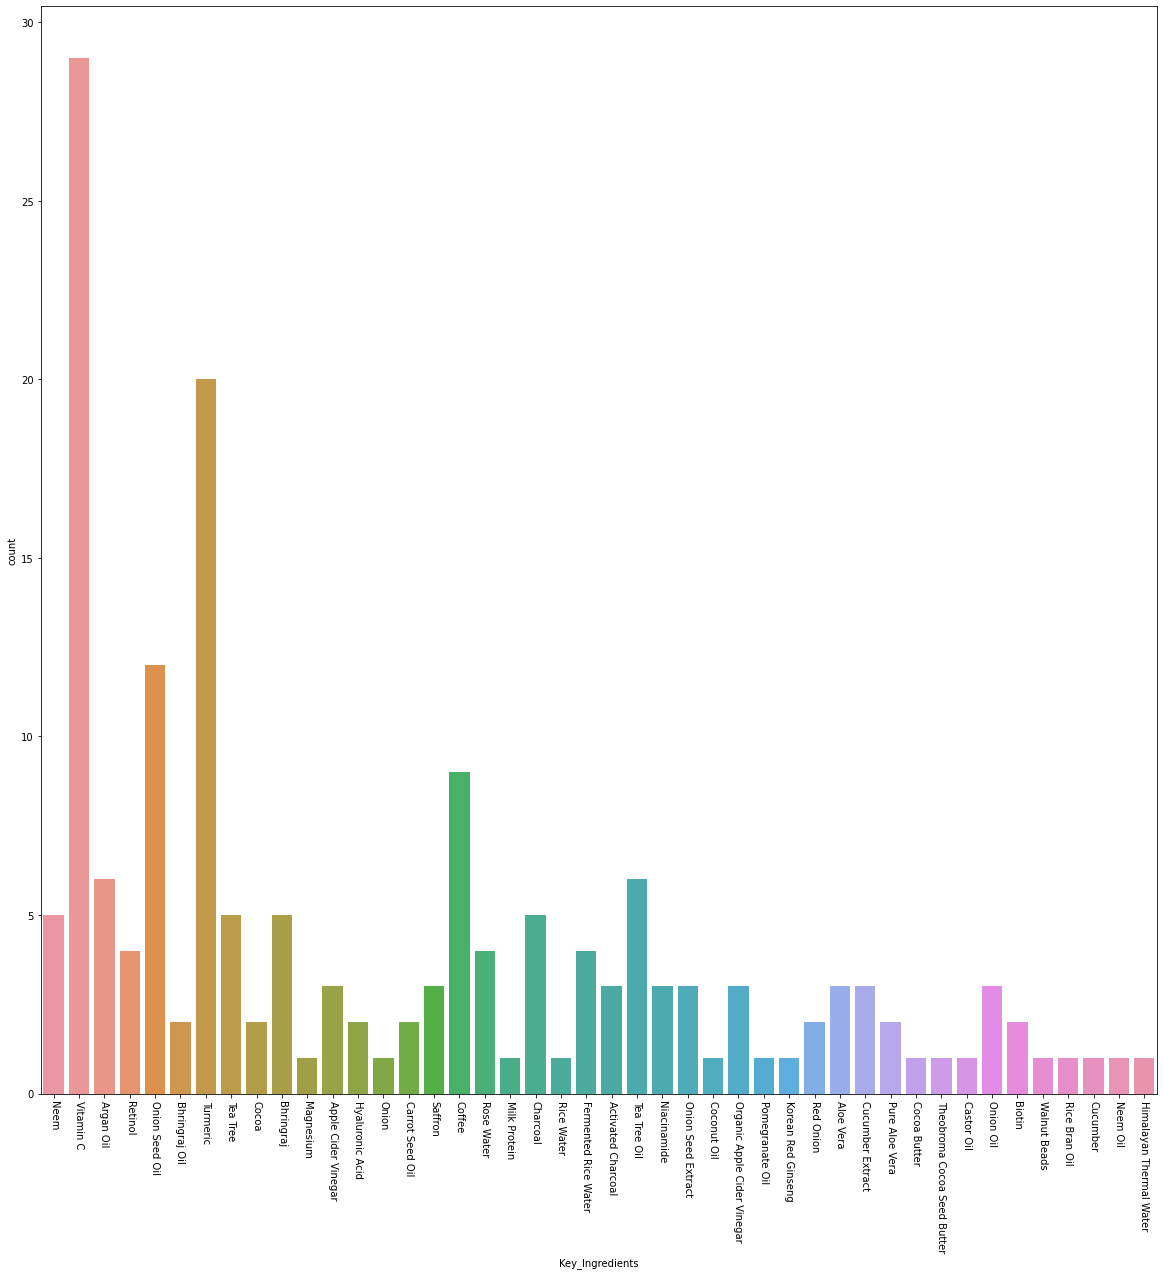

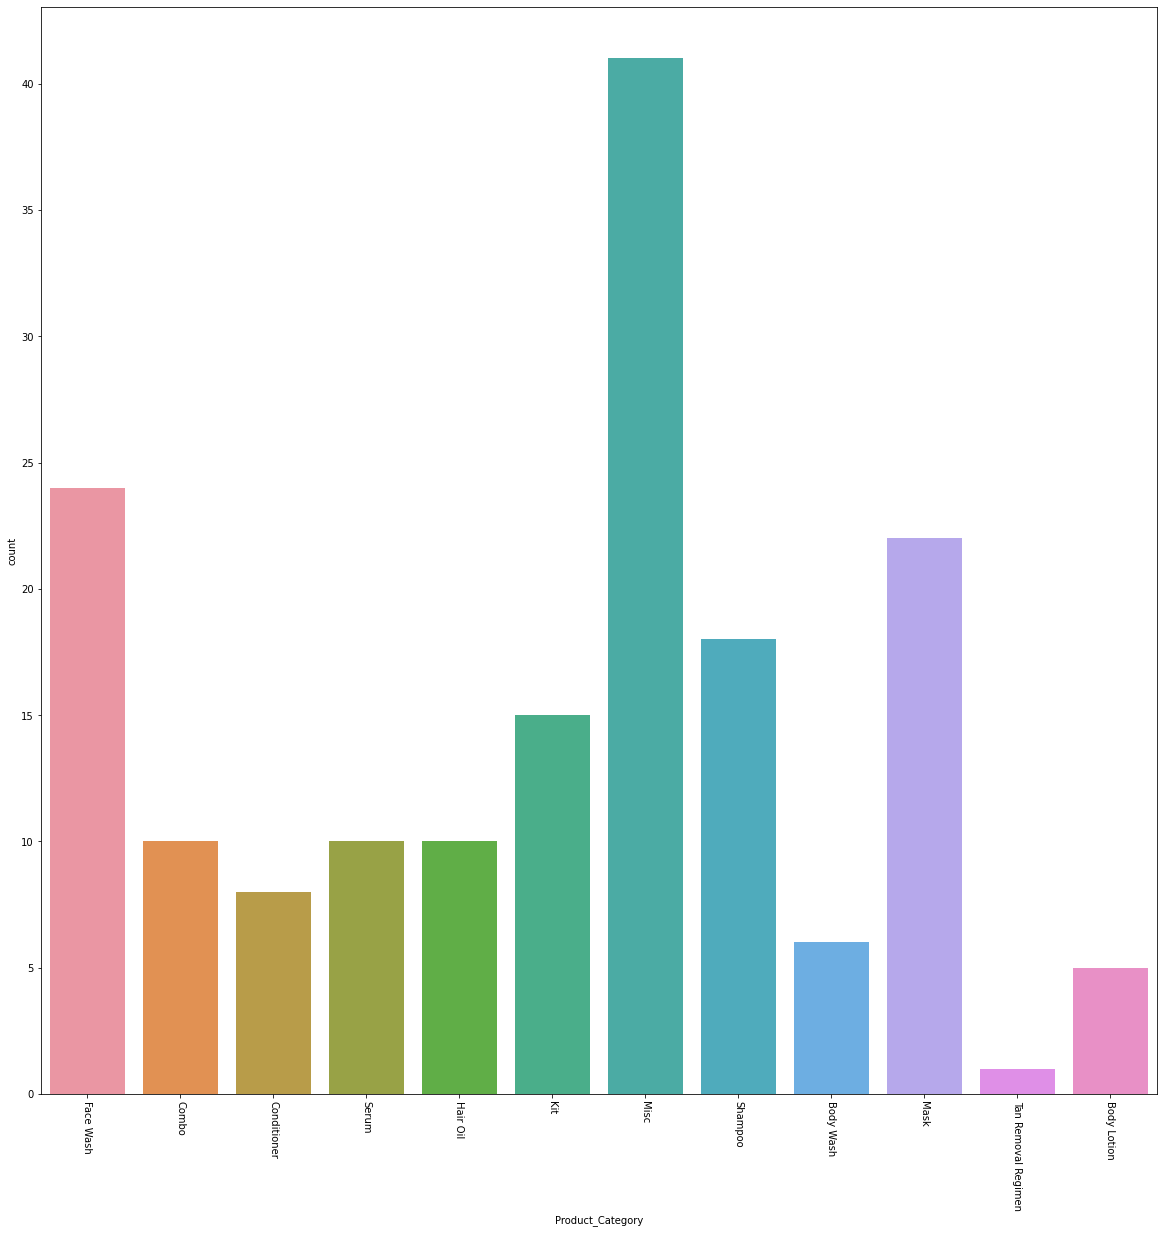

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

'''This code cell creates various plots'''

'''
1. Countplot for all the Key_Ingredients.
'''
plt.figure(figsize=(20, 20))
sns.countplot(data = mamaearth_final_data, x = 'Key_Ingredients')
plt.xticks(rotation=-90)
plt.show()

'''
2. Countplot for all the Producte Categories
'''
plt.figure(figsize=(20, 20))
sns.countplot(data = mamaearth_final_data, x = 'Product_Category')
plt.xticks(rotation=-90)
plt.show()

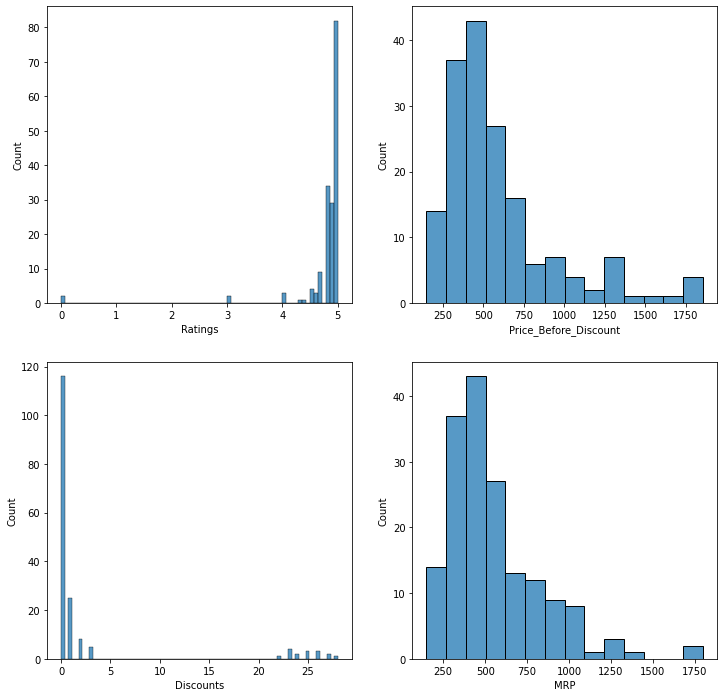

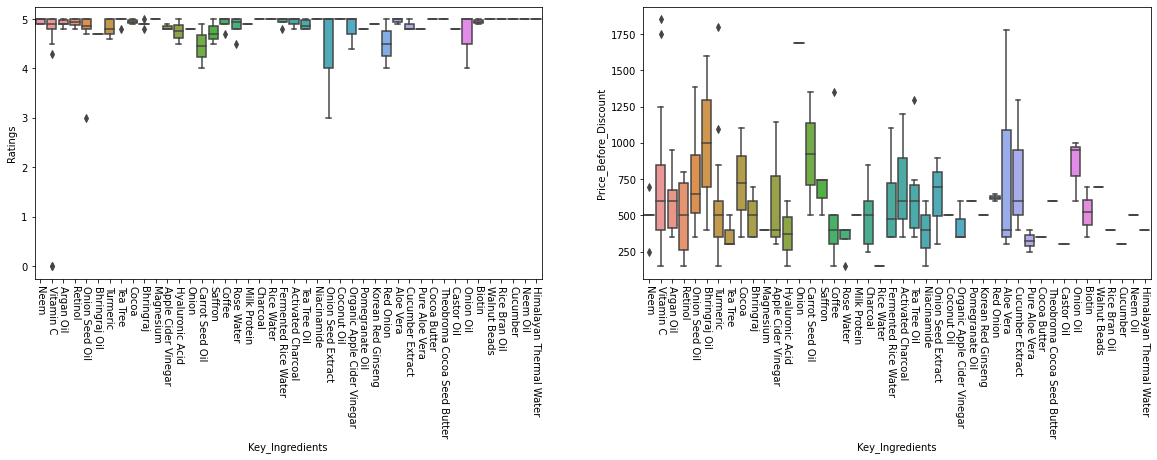

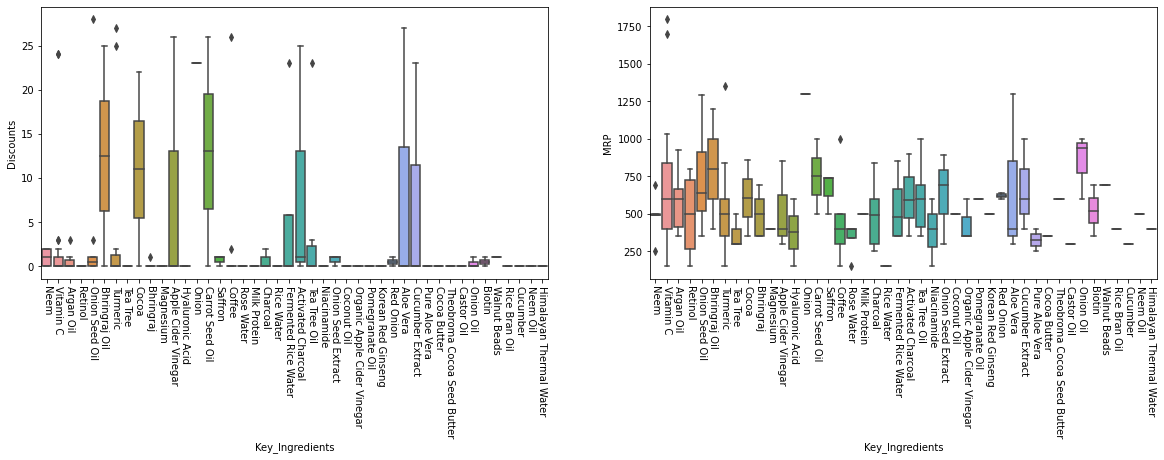

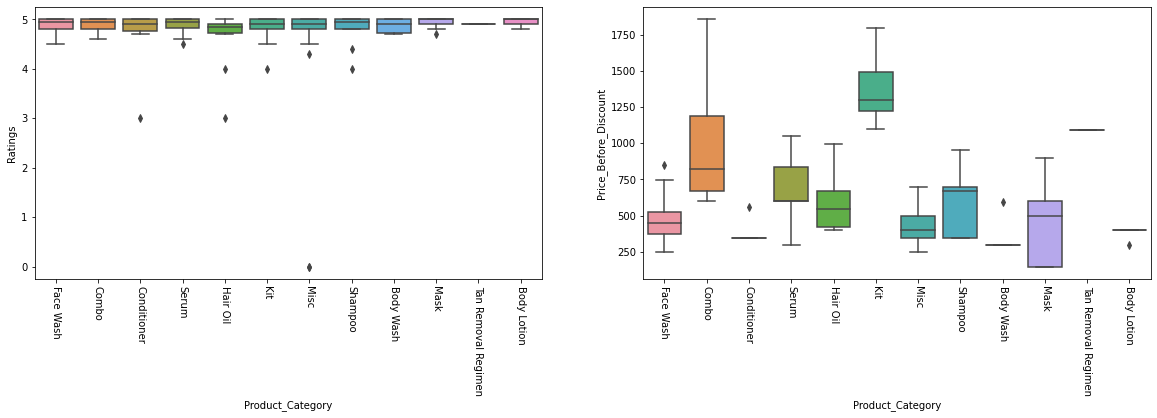

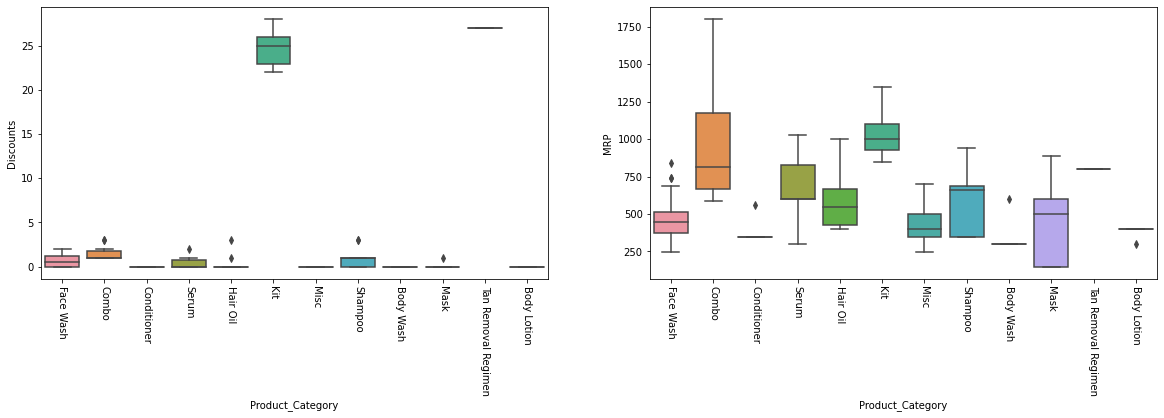

In [137]:
'''
3. Frequency distribution of numerical values
'''
data = mamaearth_final_data
columns = ['Ratings',	'Price_Before_Discount', 'Discounts',	'MRP']
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(12,12))
sns.histplot(data, x=columns[0], ax=ax1)
sns.histplot(data, x=columns[1], ax=ax2)
sns.histplot(data, x=columns[2], ax=ax3)
sns.histplot(data, x=columns[3], ax=ax4)
plt.show()
print("=========================================================================================================================================================================")
'''
4. Boxplots w.r.t key ingredients and product category
'''
x_columns = ['Key_Ingredients', 'Product_Category']

# a. Key Ingredients

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))
sns.boxplot(data=data, x=x_columns[0], y=columns[0], ax=ax1)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=-90)
sns.boxplot(data=data, x=x_columns[0], y=columns[1], ax=ax2)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=-90)
plt.show()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))
sns.boxplot(data=data, x=x_columns[0], y=columns[2], ax=ax1)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=-90)
sns.boxplot(data=data, x=x_columns[0], y=columns[3], ax=ax2)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=-90)
plt.show()
print("=========================================================================================================================================================================")

# b. Product Category

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))
sns.boxplot(data=data, x=x_columns[1], y=columns[0], ax=ax1)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=-90)
sns.boxplot(data=data, x=x_columns[1], y=columns[1], ax=ax2)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=-90)
plt.show()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))
sns.boxplot(data=data, x=x_columns[1], y=columns[2], ax=ax1)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=-90)
sns.boxplot(data=data, x=x_columns[1], y=columns[3], ax=ax2)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=-90)
plt.show()
print("=========================================================================================================================================================================")


# Machine Learning Model

**Since, there are 2 target variables in this case. One, the Key_Ingredient and the second is the Product_Category. Hence, classification model(s) have to be trained on 2 Datasets.**

### Predicting the Key_Ingredient

**Data Preparations**

I will be building a NLP based model.

In [138]:
training_data = mamaearth_final_data[['Title', 'Product_Link', 'Description', 'Reviews', 'Product_Category']] # Traning Data
target_label_1 = mamaearth_final_data['Key_Ingredients'] # Target Label

In [139]:
# Encode the target_label_1
from sklearn.preprocessing import LabelEncoder

# Model Object
le = LabelEncoder()

# fit_transform the target_variable
target_label_1 = le.fit_transform(target_label_1)

In [140]:
# Flatten the reviews
training_data['Reviews'] = training_data['Reviews'].apply(lambda x : " ".join(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [141]:
# Merge the text columns
merged_data = np.full((training_data.shape[0],), '')
for column in training_data.columns:
  merged_data = merged_data + training_data[column].values

In [142]:
merged_data[0]

"Tea Tree Facewash for acne and pimples, Pack Of 2 _ds_https://mamaearth.in/product/tea-tree-facewash-for-acne-and-pimples-pack-of-2Mamaearth’s SLS and Paraben Free Tea Tree Face Wash is a natural blend of neem and tea tree oil. It helps prevent acne by deep cleaning impurities, fighting bacteria and controlling excess oil secretion. All this, without stripping the skin off its natural oils. Aloe Vera in the face wash helps reduce redness and inflammation. Dermatologically tested and pH balanced, it takes gentle care of your skin while making it look healthy and glowing. It is absolutely safe since it contains no harmful chemicals like SLES, Sulfates, Phthalates, and Artificial Fragrances.It's amazing product..I have no words to praise it as It is the only facewash which really worked rather than other tv commercials who act good only but their products aren't. I love purchasing mamaearth facewash as It is valuable Its really an amazing product, i have tried alot of medical products fo

In [143]:
# Bag of words pipeline

'''
1. Tokenization
2. Stopword Removal
3. Stemming
4. TF-IDF Vectorizer
'''

# Import NLTK libraries

import nltk #---> NLTK : Natural Language Toolkit
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt') # Tokenizers
nltk.download('stopwords') # Downloading Stopwordss


def bag_of_words(data):

  # 1. Tokenization

  tokenizer = RegexpTokenizer('^\w+|\$[\d\.]+|\S+') # Tokenizer object
  tokenized_data = [] # List for storing the tokenized data

  for value in data:
    tokenized_text = tokenizer.tokenize(value) # tokenize the text
    tokenized_data.append(tokenized_text)
  
  # 2. Stopword Removal

  sw = stopwords.words('english') # Create a list of stopwords in English Language
  clean_data = [] # List for storing the clean data

  for value in tokenized_data:
    clean_text = [words.lower() for words in value if words.lower() not in sw] # Clean the text
    clean_data.append(clean_text)
  
  # 3. Stemming

  ps = PorterStemmer() # Create a porter stemmer object
  stemmed_data = [] # List for storing the stemmed data

  for value in clean_data:
    stemmed_text = [ps.stem(word) for word in value] # Stem each word in the text
    stemmed_data.append(stemmed_text)
  
  # 4. TF-IDF Vectorizer
  updated_data = []
  for data in stemmed_data:
    updated_data.append(" ".join(data))
  
  tfidf_vector = TfidfVectorizer() # TFIDF Object
  
  return tfidf_vector.fit_transform(updated_data)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [144]:
# Preprocess the data using the above function and convert the sparse matrix to numpy array
final_training_data = bag_of_words(merged_data).toarray()

In [145]:
final_training_data.shape

(170, 2045)

In [167]:
# Model selection
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(final_training_data, target_label_1, test_size=0.2, random_state=42)

In [147]:
# Model metrics
from sklearn.metrics import accuracy_score

def compute_metrics(data, y_true, model_obj, model):

  # Make Predictions
  y_pred = model_obj.predict(data)

  # compute accuracy
  acc = accuracy_score(y_true, y_pred)

  # create a dataframe
  metrics = pd.DataFrame(np.array([acc]), columns=['Accuracy'], index = [model])
  return metrics

In [310]:
# 1. Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Model Object
mnb = MultinomialNB() #--> Default model

# fit the model
mnb.fit(X_train, y_train)

# Compute metrics
mnb_metrics_train = compute_metrics(X_train, y_train, mnb, "NaiveBayes")
mnb_metrics_test = compute_metrics(X_test, y_test, mnb, "NaiveBayes")

In [311]:
mnb_metrics_train

,Accuracy
NaiveBayes,0.367647


In [312]:
# 2. Logistic Regression
from sklearn.linear_model import LogisticRegression

# Model Object
lr_clf = LogisticRegression() #--> Default LR model

# Fit the model
lr_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [313]:
# Compute the metrics
lr_metrics_train = compute_metrics(X_train, y_train, lr_clf, 'LogisticRegression')
lr_metrics_test = compute_metrics(X_test, y_test, lr_clf, 'LogisticRegression')

In [314]:
# 3. Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Modle Object
dt_clf = DecisionTreeClassifier() #--> Default Object

# Hyperparameter Tuning
params = {'criterion' : ['gini', 'entropy'],
          'splitter' : ['best', 'random'],
          'max_depth' : [None, 10, 20, 30, 40 , 50, 100],
          'min_samples_split' : [2, 3, 4, 5],
          'max_features' : ['auto', 'sqrt', 'log2']
          }

# Fit the model
rscv_dt = RandomizedSearchCV(dt_clf, params, n_iter=50, n_jobs=-1, verbose=1)
rscv_dt.fit(X_train, y_train)

# Compute metrics
dt_ht_metrics_train = compute_metrics(X_train, y_train, rscv_dt, 'DecisionTree')
dt_ht_metrics_test = compute_metrics(X_test, y_test, rscv_dt, 'DecisionTree')

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.7s finished


In [315]:
dt_ht_metrics_train

,Accuracy
DecisionTree,0.808824


In [316]:
dt_ht_metrics_test

,Accuracy
DecisionTree,0.264706


In [317]:
# 4. Random Forest
from sklearn.ensemble import RandomForestClassifier

# model object
rf_clf = RandomForestClassifier() # Default Model

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Fit the Model
rscv_rf = RandomizedSearchCV(rf_clf, params, 5, n_jobs=-1, verbose=1)
rscv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   39.5s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [318]:
# Compute metrics
rf_metrics_train = compute_metrics(X_train, y_train, rscv_rf, 'RandomForest')
rf_metrics_test = compute_metrics(X_test, y_test, rscv_rf, 'RandomForest')

In [319]:
rf_metrics_test

,Accuracy
RandomForest,0.5


In [320]:
rf_metrics_train

,Accuracy
RandomForest,0.897059


In [321]:
# 6. XGBoost
from xgboost import XGBClassifier

# Model Obejct
xgb_clf = XGBClassifier() # Default Model

# Hyperparameter Tuning
params = {'n_estimators' : [100, 200, 300, 400, 500, 600, 700]}

#Fit the model
rscv_xgb = RandomizedSearchCV(xgb_clf, params, n_iter=10, n_jobs=-1, verbose=1)
rscv_xgb.fit(X_train, y_train)

# Compute Metrics
xgb_metrics_train = compute_metrics(X_train, y_train, rscv_xgb, 'XGBoost')
xgb_metrics_test = compute_metrics(X_test, y_test, rscv_xgb, 'XGBoost')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed: 19.9min finished


In [328]:
xgb_metrics_train

,Accuracy
XGBoost,1.0


In [329]:
xgb_metrics_test

,Accuracy
XGBoost,0.441176


In [330]:
# Concat the metrics
columns_train = ['Accuracy_Train']
columns_test = ['Accuracy_Test']
index = ['NaiveBayes', 'LogisticRegression', 'DecisionTree', 'RandomForest', 'XGBoost']
model_metrics_train = pd.DataFrame(np.array([mnb_metrics_train, lr_metrics_train, dt_ht_metrics_train, rf_metrics_train, xgb_metrics_train]).reshape(5,1), columns=columns_train, index=index)
model_metrics_test = pd.DataFrame(np.array([mnb_metrics_test, lr_metrics_test, dt_ht_metrics_test, rf_metrics_test, xgb_metrics_test]).reshape(5,1), columns=columns_test, index=index)

In [331]:
model_metrics_1 = pd.concat((model_metrics_train, model_metrics_test), axis=1).sort_values(by='Accuracy_Test', ascending=False).reset_index()
model_metrics_1.rename(columns={'index' : 'Models'}, inplace=True)

In [332]:
model_metrics_1

,Models,Accuracy_Train,Accuracy_Test
0,RandomForest,0.897059,0.500000
1,XGBoost,1.000000,0.441176
2,LogisticRegression,0.617647,0.411765
3,DecisionTree,0.808824,0.264706
4,NaiveBayes,0.367647,0.205882


In [342]:
predictions_1 = rscv_rf.predict(X_test)

In [343]:
predictions_1

array([41, 42,  4, 29, 42, 42, 28, 42, 42, 28, 41, 28, 16, 39, 13, 42, 41,
       42, 42, 41, 41, 28, 13, 42, 38,  4, 39, 39,  3, 41, 41, 41, 41, 13])

In [344]:
predictions_1 = le.inverse_transform(predictions_1)
predictions_1 = pd.DataFrame({"Key_Ingredients" : predictions_1})
predictions_1

,Key_Ingredients
0,Turmeric
1,Vitamin C
2,Bhringraj
3,Organic Apple Cider Vinegar
4,Vitamin C
5,Vitamin C
6,Onion Seed Oil
7,Vitamin C
8,Vitamin C
9,Onion Seed Oil


## Predicting Product Category

**In this section, Product Category Classification Modle will be build.**

In [298]:
training_data_2 = mamaearth_final_data[['Title', 'Product_Link', 'Description', 'Reviews', 'Key_Ingredients']] #  Prepare the training data 
target_label_2 = mamaearth_final_data['Product_Category'] # Target Label for this case

In [299]:
# Merge the data
training_data_2['Reviews'] = training_data_2['Reviews'].apply(lambda x : ' '.join(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [300]:
# Merge the text columns
def merge_data(data):
  merged_data = np.full((data.shape[0],), '')
  for column in data.columns:
    merged_data = merged_data + data[column].values
  return merged_data

In [301]:
merged_training_data = merge_data(training_data_2)

In [302]:
# Preprocess the data using the above created function
final_training_data_2 = bag_of_words(merged_training_data)

In [303]:
# Encode the target column
le_2 = LabelEncoder()
target_label_2 = le_2.fit_transform(target_label_2)

In [351]:
# Split the data
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(final_training_data_2, target_label_2, test_size=0.2, random_state=42)

In [352]:
# Train the data on the above built models and compute the metrics

#.1 Naive Bayes
mnb.fit(X_train_2, y_train_2)
mnb_metrics_train_2 = compute_metrics(X_train_2, y_train_2, mnb, 'NaiveBayes')
mnb_metrics_test_2 = compute_metrics(X_test_2, y_test_2, mnb, 'NaiveBayes')

#.2 Logistic Regression
lr_clf.fit(X_train_2, y_train_2)
lr_metrics_train_2 = compute_metrics(X_train_2, y_train_2, lr_clf, 'LogisticRegression')
lr_metrics_test_2 = compute_metrics(X_test_2, y_test_2, lr_clf, 'LogisticRegression')

#.3 Decision Tree
rscv_dt.fit(X_train_2, y_train_2)
dt_metrics_train_2 = compute_metrics(X_train_2, y_train_2, rscv_dt, 'DecisionTree')
dt_metrics_test_2 = compute_metrics(X_test_2, y_test_2, rscv_dt, 'DecisionTree')

#.4 Random Forest
rscv_rf.fit(X_train_2, y_train_2)
rf_metrics_train_2 = compute_metrics(X_train_2, y_train_2, rscv_rf, 'RandomForest')
rf_metrics_test_2 = compute_metrics(X_test_2, y_test_2, rscv_rf, 'RandomForest')

#.5 XGBoost
rscv_xgb.fit(X_train_2, y_train_2)
xgb_metrics_train_2 = compute_metrics(X_train_2, y_train_2, rscv_xgb, 'XGBoost')
xgb_metrics_test_2 = compute_metrics(X_test_2, y_test_2, rscv_xgb, 'XGBoost')

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   42.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  3.0min finished


In [353]:
model_metrics_train_2 = pd.DataFrame(np.array([mnb_metrics_train_2, lr_metrics_train_2, dt_metrics_train_2, rf_metrics_train_2, xgb_metrics_train_2]).reshape(5,1), columns=columns_train, index=index)
model_metrics_test_2 = pd.DataFrame(np.array([mnb_metrics_test_2, lr_metrics_test_2, dt_metrics_test_2, rf_metrics_test_2, xgb_metrics_test_2]).reshape(5,1), columns=columns_test, index=index)
model_metrics_2 = pd.concat((model_metrics_train_2, model_metrics_test_2), axis=1).sort_values(by='Accuracy_Test', ascending = False).reset_index()
model_metrics_2.rename(columns={'index' : 'Models'}, inplace=True)
model_metrics_2

,Models,Accuracy_Train,Accuracy_Test
0,RandomForest,1.000000,0.705882
1,XGBoost,1.000000,0.705882
2,LogisticRegression,0.735294,0.529412
3,NaiveBayes,0.610294,0.441176
4,DecisionTree,0.911765,0.382353


In [354]:
predictions_2 = rscv_rf.predict(X_test_2)
predictions_2 = le_2.inverse_transform(predictions_2)
predictions_2 = pd.DataFrame({"Product_Category" : predictions_2})

In [356]:
predictions_2

,Product_Category
0,Face Wash
1,Kit
2,Conditioner
3,Face Wash
4,Combo
5,Misc
6,Shampoo
7,Mask
8,Misc
9,Shampoo


# Writing the Results in the Excel File

In [240]:
!pip install xlsxwriter

     |████████████████████████████████| 153kB 7.7MB/s 


In [357]:
import xlsxwriter
writer = pd.ExcelWriter("/content/mamaearth_task_1.xlsx", engine='xlsxwriter')

# Write the final data in the Excel file
mamaearth_final_data.to_excel(writer, sheet_name='MamaearthData', index=False)

# Write the Results of the first classifaction task in the excel file
predictions_1.to_excel(writer, sheet_name='KeyIngredients', index=False)
model_metrics_1.to_excel(writer, sheet_name='KeyIngredientsClfMetrics', index=False)

# Write the Results of the second classifaction task in the excel file
predictions_2.to_excel(writer, sheet_name='ProductCategory', index=False)
model_metrics_2.to_excel(writer, sheet_name='ProductCategoryClfMetrics', index=False)

# Save the writer
writer.save()